<a href="https://colab.research.google.com/github/Jordy-Rodrigues/PROJETO-COM-PCA/blob/main/Projeto_de_Estudo_utilizando_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CLASSIFICADOR SEM PCA (STELLAR)



In [105]:
# IMPORTAR AS BIBLIOTECAS NECESSÁRIAS PARA MODELAR OS DADOS
import pandas as pd
import numpy as np
import time

In [106]:
# UTILIZAR O PANDAS PARA ABRIR O DATASET ENCONTRADO NO KAGGLE
dataset_stellar= pd.read_csv('/content/drive/MyDrive/star_classification.csv', delimiter=',')

In [107]:
# MOSTRAR A BASE DE DADOS
print(dataset_stellar)

             obj_ID       alpha      delta         u         g         r  \
0      1.237661e+18  135.689107  32.494632  23.87882  22.27530  20.39501   
1      1.237665e+18  144.826101  31.274185  24.77759  22.83188  22.58444   
2      1.237661e+18  142.188790  35.582444  25.26307  22.66389  20.60976   
3      1.237663e+18  338.741038  -0.402828  22.13682  23.77656  21.61162   
4      1.237680e+18  345.282593  21.183866  19.43718  17.58028  16.49747   
...             ...         ...        ...       ...       ...       ...   
99995  1.237679e+18   39.620709  -2.594074  22.16759  22.97586  21.90404   
99996  1.237679e+18   29.493819  19.798874  22.69118  22.38628  20.45003   
99997  1.237668e+18  224.587407  15.700707  21.16916  19.26997  18.20428   
99998  1.237661e+18  212.268621  46.660365  25.35039  21.63757  19.91386   
99999  1.237661e+18  196.896053  49.464643  22.62171  21.79745  20.60115   

              i         z  run_ID  rerun_ID  cam_col  field_ID   spec_obj_ID  \
0      

In [108]:
# SEPARAR A VARIÁVEL X DEPENDENTE, E A VARIÁVEL Y INDEPENDENTE
x= dataset_stellar.loc[:, dataset_stellar.columns !='class'].values
y= dataset_stellar['class'].values

In [109]:
# MOSTRAR O TOTAL DE COLUNAS 
len (dataset_stellar.columns)

18

In [110]:
# MOSTRAR A QUANTIDADE DE GALÁXIAS, QUASARES E ESTRELAS TEM NA COLUNA Y
np.unique(y, return_counts=True)

(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([59445, 18961, 21594]))

MACHINE LEARNING

In [111]:
# CONVERTER OS VALORES CATEGORICOS EM VALORES NUMÉRICOS
from sklearn.preprocessing import LabelEncoder
labelencoder_y= LabelEncoder()
y= labelencoder_y.fit_transform(y)

In [112]:
# PADRONIZAR AS FEATURES E DEIXA-LAS NORMALIZADAS PARA O MODELO
from sklearn.preprocessing import StandardScaler
scale_obj= StandardScaler()
x= scale_obj.fit_transform(x.astype(float))


In [113]:
# SEPARAR UMA PARTE DA BASE DE DADOS PARA TREINAR E TESTAR O MODELO
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest= train_test_split(x,y, test_size=0.15)

In [114]:
# UTILIZAR A BIBLIOTECA REGRESSÃO LOGÍSTICA
from sklearn.linear_model import LogisticRegression
model= LogisticRegression(solver='lbfgs', max_iter=400)

# INICIAR E CONCLUIR A CRONOMETRAGEM DO TEMPO DE TREINO
start_time= time.perf_counter()
model.fit(xTrain,yTrain)
end_time= time.perf_counter()

# IMPRIMIR O TEMPO DE TREINO OBS: SEM UTILIZAR O PCA
print('Tempo de treino:',end_time - start_time)

Tempo de treino: 17.48795658600011


In [115]:
# PONTUAÇÃO DO MODELO
model.score(xTest,yTest)

0.9584

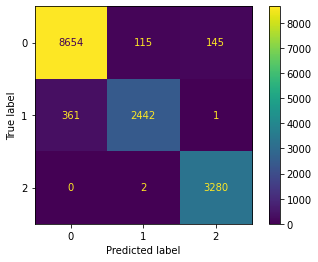

In [116]:
# MOSTRAR O RESULTADO EM GRÁFICO
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(model, xTest, yTest)

# CLASSIFICADOR COM PCA (STELLAR)

In [117]:
# IMPORTAR O PCA, COMPRIMIR AS COLUNAS E TREINAR E TESTAR O MODELO
from sklearn import decomposition
pca= decomposition.PCA(n_components=10)
xTrain= pca.fit_transform (xTrain)
xTest= pca.transform(xTest)

In [118]:
# IMPORTAR A BIBLIOTECA REGRESSÃO LOGÍSTICA
from sklearn.linear_model import LogisticRegression
model= LogisticRegression(solver='lbfgs',max_iter=400)

# INICIAR E CONCLUIR A CRONOMETRAGEM DO TEMPO DE TREINO
start_time= time.perf_counter()
model.fit(xTrain, yTrain)
end_time= time.perf_counter()

# IMPRIMIR O TEMPO DE TREINO OBS: COM O PCA
print("Tempo de Treino:", end_time - start_time)

Tempo de Treino: 6.166418565999265


In [119]:
# MONTUAÇÃO DO MODELO
model.score(xTest,yTest)

0.9522666666666667

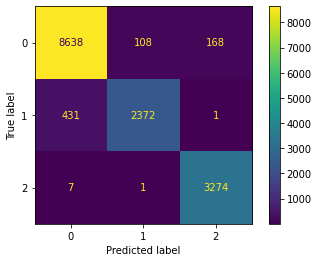

In [120]:
# MOSTRAR O GRÁFICO NA MATRIZ DE CONFUSÃO
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(model,xTest,yTest)

In [121]:
# PCA COM 2 COMPONENTES PARA UMA VISUALIZAÇÃO 2D EM UM GRÁFICO 
from sklearn.decomposition import PCA
pca_viewer=PCA(n_components=2)
principal_components= pca_viewer.fit_transform(xTrain)

# VARIAÇÃO DO PCA EM RELAÇÃO AO TOTAL ORIGINAL
print(pca_viewer.explained_variance_ratio_)

[0.28609324 0.21267919]


In [122]:
# CRIAR UM DATAFRAME UTILIZANDO PANDAS 
principal_components_df= pd.DataFrame(data= principal_components, 
                                      columns=['principal component 1','principal component 2'])

In [123]:
# MOSTRAR AS DUAS COLUNAS 
principal_components_df

,principal component 1,principal component 2
0,-1.927803,0.173483
1,3.148501,-0.348950
2,0.643592,-0.141856
3,-3.492876,0.443187
4,-0.424921,0.042732
...,...,...
84995,0.202886,-0.157035
84996,-0.886181,-0.006210
84997,-0.905803,0.093070
84998,0.360711,-0.099323


<Figure size 432x288 with 0 Axes>

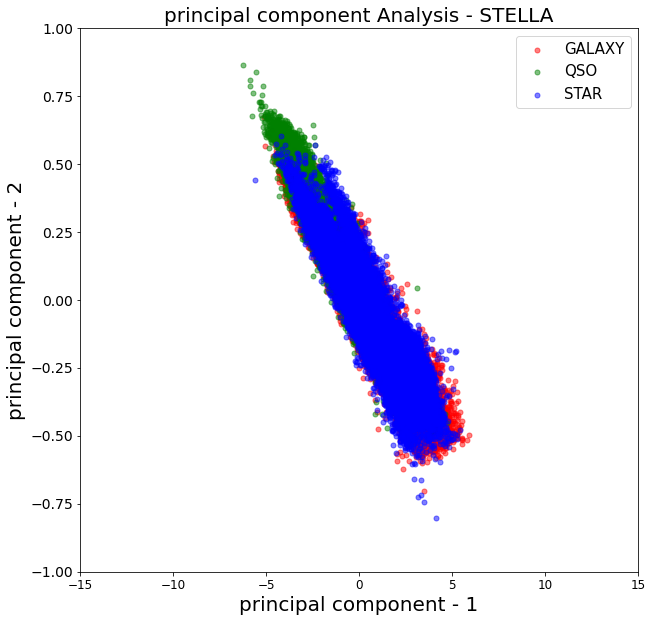

In [124]:
# GERAR GRÁFICO
yTrain.astype(int)
yTrain= np.where(yTrain == 0,'GALAXY', yTrain)
yTrain= np.where(yTrain == '1','QSO', yTrain)
yTrain= np.where(yTrain == '2','STAR', yTrain)

plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('principal component - 1', fontsize=20)
plt.ylabel('principal component - 2', fontsize=20)
plt.xlim(-15,15)
plt.ylim(-1,1)
plt.title('principal component Analysis - STELLA', fontsize=20)
targets=['GALAXY','QSO','STAR']
colors=['r','g','b']

for target, color in zip (targets, colors):
  indicesToKeep= yTrain== target
  plt.scatter(principal_components_df.loc[indicesToKeep,'principal component 1'],
              principal_components_df.loc[indicesToKeep,'principal component 2'],
              c=color, s=25, alpha=0.5)
plt.legend(targets,prop={'size':15})
plt.show()